# Turn a picture into a spike train

Following: https://github.com/fzenke/pub2018superspike/blob/master/themes/mktarget.py

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import scipy.misc
import numpy as np

dt = 10e-3
filename = "tm_line"

imgc = plt.imread("%s.jpeg" % filename)
print(imgc.shape)
img = imgc.mean(2)
print(img.shape)
jitter = random.rand(*img.shape) * dt

n = img.shape[0]

(225, 352, 3)
(225, 352)


In [2]:
threshold = 160.0

with open("%s-target.ras" % filename, 'w') as f:
    for j in range(img.shape[1]):
        for i in range(img.shape[0]):
            if img[i, j] <= threshold:
                f.write("%f %i\n" % (dt * j + jitter[i, j], n - i))

with open("%s-info.txt" % filename, 'w') as f:
    f.write("# neurons %i, temporal resolution %fs, time grid %fs\n" % (n, dt, dt * img.shape[1]))
    f.write("filename=%s\n" % (filename))

with open("%s-conf.env" % filename, 'w') as f:
    f.write("export HEIGHT=%i\n" % (n))
    f.write("export GRID=%f\n" % (dt * img.shape[1]))

# Test how the spike train looks

Processed 10274 rows.


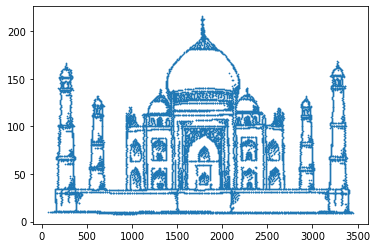

In [3]:
f_path = "tm_line-target.ras"
times = []
neurons = []
c = 0
with open(f_path) as f:
    for line in f:
        c += 1
        entry_str = line.strip()
        entry_split = entry_str.split(' ')
        times.append(float(entry_split[0]) * 1000)
        neurons.append(int(entry_split[1]))

print("Processed " + str(c) + " rows.")

# Plot the target pattern
fig, ax = plt.subplots()
ax.scatter(times, neurons, s=0.5)
plt.show()